# Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold , KFold
from sklearn.preprocessing import StandardScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

pd.set_option('max.columns', None)

# Read File

In [3]:
# Read input file
telecom =  pd.read_csv('telecom_churn_data.csv')
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [6]:
### Drop duplicates
telecom.drop_duplicates()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0            6/30/2014            7/31/2014   
2                 0.0            6/30/2014            7/31/2014   
3                 0.0            6/30/2014            7/31/2014   
4                 0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0                8/31/2014            9/30/2014  197.385  214.816  213.803   
1                8/31/2014            9/30/2014   34.047  355.074  268.321   
2                8/31/2014            9/30/2014  167.690  189.058  210.226   
3                8/31/2014            9/30/2014  221.338  251.102  508.054   
4                8/31/2014            9/30/2014  261.636  309.876  238.174   
...                    ...                  ...      ...      ...      ...   
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100          NaN          NaN         0.00          NaN   
1       86.285        24.11        78.68         7.68        18.34   
2      290.714        11.54        55.24        37.26        74.81   
3      389.500        99.91        54.39       310.98       241.71   
4      163.426        50.31       149.44        83.89        58.78   
...        ...          ...          ...          ...          ...   
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0               NaN           NaN          0.00           NaN            NaN   
1             15.74         99.84        304.76         53.76            0.0   
2            143.33        220.59        208.36        118.91            0.0   
3            123.31        109.01         71.68        113.54            0.0   
4             76.96         91.88        124.26         45.81            0.0   
...             ...           ...           ...           ...            ...   
99994         15.19         54.46         52.79         27.

(array([1.4539e+04, 8.0550e+03, 1.8810e+03, 4.6500e+02, 3.0400e+02,
        1.4100e+02, 4.4000e+01, 4.4000e+01, 3.8000e+01, 1.3000e+01,
        1.3000e+01, 1.0000e+01, 7.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000e-01, 1.75080e+02, 3.49660e+02, 5.24240e+02, 6.98820e+02,
        8.73400e+02, 1.04798e+03, 1.22256e+03, 1.39714e+03, 1.57172e+03,
        1.74630e+03, 1.92088e+03, 2.09546e+03, 2.27004e+03, 2.44462e+03,
        2.61920e+03, 2.79378e+03, 2.96836e+03, 3.14294e+03, 3.31752e+03,
        3.49210e+03, 3.66668e+03, 3.84126e+03, 4.01584e+03, 4.19042e+03,
        4.36500e+03]),
 <a list of 25 Patch objects>)

<Figure size 432x288 with 0 Axes>

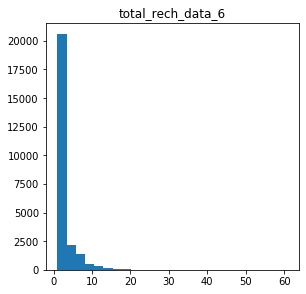

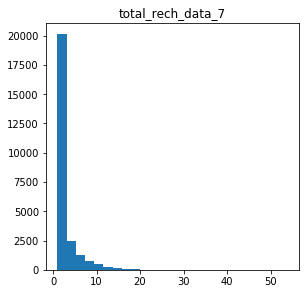

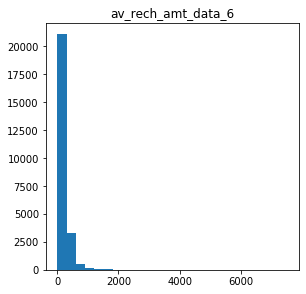

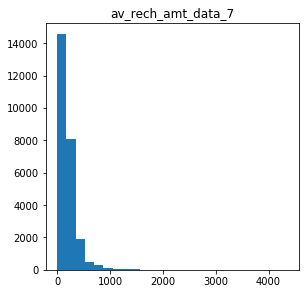

In [6]:
###Checking if the particular value follows a trend (if 5 values are '1' & 1 value is '0' then it is very likely that 7th value will be '1')

plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(telecom.total_rech_data_6.dropna(), bins=25)

plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(telecom.total_rech_data_7.dropna(), bins=25)

plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(telecom.av_rech_amt_data_6.dropna(), bins=25)

plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(telecom.av_rech_amt_data_7.dropna(), bins=25)

# Filter high-value customers

In [7]:
#2. Filter high-value customers

telecom['total_recharge_6'] = telecom[['total_rech_amt_6','total_rech_data_6']].sum(axis=1)
telecom['total_recharge_7'] = telecom[['total_rech_amt_7','total_rech_data_7']].sum(axis=1)

telecom['avg_recharge_goodphase'] = telecom[[ 'total_recharge_6','total_recharge_7']].mean(axis=1)
p = telecom['avg_recharge_goodphase'].quantile(0.7)
telecom = telecom[telecom['avg_recharge_goodphase'] > p]
telecom

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
13        7002191713        109             0.0             0.0   
16        7000875565        109             0.0             0.0   
17        7000187447        109             0.0             0.0   
...              ...        ...             ...             ...   
99970     7001386760        109             0.0             0.0   
99974     7001453306        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99988     7002111859        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
7                 0.0            6/30/2014            7/31/2014   
8                 0.0            6/30/2014            7/31/2014   
13                0.0            6/30/2014            7/31/2014   
16                0.0            6/30/2014            7/31/2014   
17                0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99970             0.0            6/30/2014            7/31/2014   
99974             0.0            6/30/2014            7/31/2014   
99986             0.0            6/30/2014            7/31/2014   
99988             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
7                8/31/2014            9/30/2014  1069.180  1349.850  3171.480   
8                8/31/2014            9/30/2014   378.721   492.223   137.362   
13               8/31/2014            9/30/2014   492.846   205.671   593.260   
16               8/31/2014            9/30/2014   430.975   299.869   187.894   
17               8/31/2014            9/30/2014   690.008    18.980    25.499   
...                    ...                  ...       ...       ...       ...   
99970            8/31/2014            9/30/2014   261.269   410.614   290.851   
99974            8/31/2014            9/30/2014   414.303   321.093   371.016   
99986            8/31/2014            9/30/2014   644.973   455.228   564.334   
99988            8/31/2014            9/30/2014   312.558   512.932   402.080   
99997            8/31/2014            9/30/2014   322.991   303.386   606.817   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
7      500.000        57.84        54.68        52.29          NaN   
8      166.787       413.69       351.03        35.08        33.46   
13     322.732       501.76       108.39       534.24       244.81   
16     206.490        50.51        74.01        70.61        31.34   
17     257.583      1185.91         9.28         7.79       558.51   
...        ...          ...          ...          ...          ...   
99970  330.963         5.01       142.59        97.61       206.19   
99974  306.689        17.56         0.00         1.30         2.46   
99986  267.451       806.73       549.36       775.41       692.63   
99988  533.502       199.89       174.46         2.46         7.16   
99997  731.010         0.00         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
7            453.43        567.16        325.91           NaN          16.23   
8             94.66         80.63        136.48        108.71           0.00   
13           413.31        119.28        482.46        214.06          23.53   
16           296.29        229.74        162.76        224.39           0.00   
17            61.64          0.00          5.54         87.89           0.00   
...             ...           ...           ...           ...            ...   
99970        329.58    

# Tag churners

In [8]:
#3. Tag churners and remove attributes of the churn phase

# 0 --- Not Churned
# 1 --- Curned

telecom['Churn'] = telecom[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].mean(axis=1)
telecom['Churn'] = telecom['Churn'].apply(lambda x: 0 if x>0 else 1)

In [9]:
telecom

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
13        7002191713        109             0.0             0.0   
16        7000875565        109             0.0             0.0   
17        7000187447        109             0.0             0.0   
...              ...        ...             ...             ...   
99970     7001386760        109             0.0             0.0   
99974     7001453306        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99988     7002111859        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
7                 0.0            6/30/2014            7/31/2014   
8                 0.0            6/30/2014            7/31/2014   
13                0.0            6/30/2014            7/31/2014   
16                0.0            6/30/2014            7/31/2014   
17                0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99970             0.0            6/30/2014            7/31/2014   
99974             0.0            6/30/2014            7/31/2014   
99986             0.0            6/30/2014            7/31/2014   
99988             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
7                8/31/2014            9/30/2014  1069.180  1349.850  3171.480   
8                8/31/2014            9/30/2014   378.721   492.223   137.362   
13               8/31/2014            9/30/2014   492.846   205.671   593.260   
16               8/31/2014            9/30/2014   430.975   299.869   187.894   
17               8/31/2014            9/30/2014   690.008    18.980    25.499   
...                    ...                  ...       ...       ...       ...   
99970            8/31/2014            9/30/2014   261.269   410.614   290.851   
99974            8/31/2014            9/30/2014   414.303   321.093   371.016   
99986            8/31/2014            9/30/2014   644.973   455.228   564.334   
99988            8/31/2014            9/30/2014   312.558   512.932   402.080   
99997            8/31/2014            9/30/2014   322.991   303.386   606.817   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
7      500.000        57.84        54.68        52.29          NaN   
8      166.787       413.69       351.03        35.08        33.46   
13     322.732       501.76       108.39       534.24       244.81   
16     206.490        50.51        74.01        70.61        31.34   
17     257.583      1185.91         9.28         7.79       558.51   
...        ...          ...          ...          ...          ...   
99970  330.963         5.01       142.59        97.61       206.19   
99974  306.689        17.56         0.00         1.30         2.46   
99986  267.451       806.73       549.36       775.41       692.63   
99988  533.502       199.89       174.46         2.46         7.16   
99997  731.010         0.00         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
7            453.43        567.16        325.91           NaN          16.23   
8             94.66         80.63        136.48        108.71           0.00   
13           413.31        119.28        482.46        214.06          23.53   
16           296.29        229.74        162.76        224.39           0.00   
17            61.64          0.00          5.54         87.89           0.00   
...             ...           ...           ...           ...            ...   
99970        329.58    

In [10]:

#After tagging churners, remove all the attributes corresponding to the churn phase 
#(all attributes having ‘ _9’, etc. in their names).

filter_col = [col for col in telecom if col.endswith('_9')]
telecom = telecom.drop(filter_col,axis=1)


In [11]:
telecom

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
13        7002191713        109             0.0             0.0   
16        7000875565        109             0.0             0.0   
17        7000187447        109             0.0             0.0   
...              ...        ...             ...             ...   
99970     7001386760        109             0.0             0.0   
99974     7001453306        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99988     7002111859        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
7                 0.0            6/30/2014            7/31/2014   
8                 0.0            6/30/2014            7/31/2014   
13                0.0            6/30/2014            7/31/2014   
16                0.0            6/30/2014            7/31/2014   
17                0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99970             0.0            6/30/2014            7/31/2014   
99974             0.0            6/30/2014            7/31/2014   
99986             0.0            6/30/2014            7/31/2014   
99988             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7                8/31/2014  1069.180  1349.850  3171.480        57.84   
8                8/31/2014   378.721   492.223   137.362       413.69   
13               8/31/2014   492.846   205.671   593.260       501.76   
16               8/31/2014   430.975   299.869   187.894        50.51   
17               8/31/2014   690.008    18.980    25.499      1185.91   
...                    ...       ...       ...       ...          ...   
99970            8/31/2014   261.269   410.614   290.851         5.01   
99974            8/31/2014   414.303   321.093   371.016        17.56   
99986            8/31/2014   644.973   455.228   564.334       806.73   
99988            8/31/2014   312.558   512.932   402.080       199.89   
99997            8/31/2014   322.991   303.386   606.817         0.00   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7            54.68        52.29        453.43        567.16        325.91   
8           351.03        35.08         94.66         80.63        136.48   
13          108.39       534.24        413.31        119.28        482.46   
16           74.01        70.61        296.29        229.74        162.76   
17            9.28         7.79         61.64          0.00          5.54   
...            ...          ...           ...           ...           ...   
99970       142.59        97.61        329.58        500.14        355.48   
99974         0.00         1.30        428.41        366.78        360.58   
99986       549.36       775.41        784.76        617.13        595.44   
99988       174.46         2.46        175.88        277.01        248.33   
99997         0.00         0.00          0.00          0.00          0.00   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
7              16.23          33.49          31.64          23.74   
8               0.00           0.00           0.00           0.00   
13             23.53         144.24          72.11           7.98   
16              0.00           2.83           0.00           0.00   
17              0.00           4.76           4.81           0.00   
...              ...            ...            ...            ...   
99970           5.06           0.00           0.00          46.04   
99974           0.00           0.00        

# Data Cleaning

In [12]:
#Dropping date columns
del_col = ['avg_recharge_goodphase','total_recharge_6','total_recharge_7','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6',
           'date_of_last_rech_data_7','loc_og_t2o_mou','last_date_of_month_7','last_date_of_month_8','total_recharge_6','total_recharge_7','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

telecom = telecom.drop(del_col,axis=1)
telecom

mobile_number  circle_id  std_og_t2o_mou  loc_ic_t2o_mou  \
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
13        7002191713        109             0.0             0.0   
16        7000875565        109             0.0             0.0   
17        7000187447        109             0.0             0.0   
...              ...        ...             ...             ...   
99970     7001386760        109             0.0             0.0   
99974     7001453306        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99988     7002111859        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

      last_date_of_month_6    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7                6/30/2014  1069.180  1349.850  3171.480        57.84   
8                6/30/2014   378.721   492.223   137.362       413.69   
13               6/30/2014   492.846   205.671   593.260       501.76   
16               6/30/2014   430.975   299.869   187.894        50.51   
17               6/30/2014   690.008    18.980    25.499      1185.91   
...                    ...       ...       ...       ...          ...   
99970            6/30/2014   261.269   410.614   290.851         5.01   
99974            6/30/2014   414.303   321.093   371.016        17.56   
99986            6/30/2014   644.973   455.228   564.334       806.73   
99988            6/30/2014   312.558   512.932   402.080       199.89   
99997            6/30/2014   322.991   303.386   606.817         0.00   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7            54.68        52.29        453.43        567.16        325.91   
8           351.03        35.08         94.66         80.63        136.48   
13          108.39       534.24        413.31        119.28        482.46   
16           74.01        70.61        296.29        229.74        162.76   
17            9.28         7.79         61.64          0.00          5.54   
...            ...          ...           ...           ...           ...   
99970       142.59        97.61        329.58        500.14        355.48   
99974         0.00         1.30        428.41        366.78        360.58   
99986       549.36       775.41        784.76        617.13        595.44   
99988       174.46         2.46        175.88        277.01        248.33   
99997         0.00         0.00          0.00          0.00          0.00   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
7              16.23          33.49          31.64          23.74   
8               0.00           0.00           0.00           0.00   
13             23.53         144.24          72.11           7.98   
16              0.00           2.83           0.00           0.00   
17              0.00           4.76           4.81           0.00   
...              ...            ...            ...            ...   
99970           5.06           0.00           0.00          46.04   
99974           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
7              12.59          38.06             51.39             31.38   
8               0.00           0.00            297.13            217.59   
13             35.26           1.44             49.63              6.19   
16             17.74           0.00             42.61             65.16   
17              8.46          13.34             38.99              0.00   
...              ...            ...               ...               ...   
99970           0.00           0.00           

In [13]:
###Identifying the columns with no varience 

count = telecom.nunique().sort_values(ascending=False)
count_1 = count[count == 0]

drop_columns = list(count_1.index)

count_2 = count[count == 1]

drop_columns += list(count_2.index)

telecom.drop(drop_columns, axis=1, inplace=True)

telecom.shape

(29991, 151)

In [14]:
###Checking for missing values in rows

missing_row = telecom.isnull().sum(axis=1)
missing_row[missing_row>0]

7        27
8         9
13       18
16       27
17       27
         ..
99963    18
99965    27
99970     9
99974    27
99988     9
Length: 22426, dtype: int64

In [15]:
telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.999100e+04  29991.000000  29991.000000  29991.000000  29675.000000   
mean    7.001223e+09    587.508744    589.307962    534.936914    299.165509   
std     6.848384e+05    442.768402    462.993562    492.405576    462.341747   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000641e+09    364.265000    365.193500    289.759500     42.830000   
50%     7.001231e+09    495.890000    493.664000    452.128000    128.210000   
75%     7.001814e+09    704.100500    700.880500    671.304000    357.120000   
90%     7.002167e+09    994.201000    995.901000    985.424000    799.728000   
95%     7.002287e+09   1240.927000   1261.703500   1258.621500   1161.345000   
99%     7.002387e+09   1983.355500   1999.504400   1988.066300   2173.905600   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29688.000000  29051.000000  29675.000000  29688.000000  29051.000000   
mean     307.373818    276.178523    422.373027    428.191753    387.104736   
std      483.345525    471.615733    471.286817    487.302221    480.482452   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       42.540000     32.070000    141.210000    139.280000    107.410000   
50%      127.835000    106.190000    285.860000    285.455000    251.340000   
75%      364.495000    309.970000    527.520000    536.932500    493.635000   
90%      829.696000    744.760000    920.996000    938.646000    866.830000   
95%     1214.293500   1130.710000   1274.810000   1291.833000   1201.295000   
99%     2228.255000   2220.865000   2335.756800   2420.819000   2233.145000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29675.000000   29688.000000   29051.000000   29675.000000   
mean       17.605408      13.668807      13.682943      29.648735   
std        79.576736      76.705276      75.730508     119.197797   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        33.260000      18.789000      20.260000      66.060000   
95%        95.448000      64.035500      65.915000     170.096000   
99%       350.271600     294.497000     291.610000     546.037800   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29688.000000   29051.000000      29675.000000      29688.000000   
mean       22.267720      22.166392         95.680280         96.701919   
std        98.423136     107.908405        237.981087        249.285426   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          8.790000          9.580000   
50%         0.000000       0.000000         33.280000         33.810000   
75%         0.000000       0.000000         92.685000         92.445000   
90%        42.045000      39.540000        209.322000        209.483000   
95%       120.916000     118.775000        350.825000        349.620500   
99%       453.230800     445.480000       1079.345000       1065.580900   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      29051.000000      29675.000000      29688.000000      29051.000000   
mean          89.947563        183.151130        183.069093        172.984234   
std          238.034766        250.829009        241.322176        236.733842   
min            0.000000          0.000000  

In [16]:

telecom

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7         7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8         7001524846   378.721   492.223   137.362       413.69       351.03   
13        7002191713   492.846   205.671   593.260       501.76       108.39   
16        7000875565   430.975   299.869   187.894        50.51        74.01   
17        7000187447   690.008    18.980    25.499      1185.91         9.28   
...              ...       ...       ...       ...          ...          ...   
99970     7001386760   261.269   410.614   290.851         5.01       142.59   
99974     7001453306   414.303   321.093   371.016        17.56         0.00   
99986     7001729035   644.973   455.228   564.334       806.73       549.36   
99988     7002111859   312.558   512.932   402.080       199.89       174.46   
99997     7000498689   322.991   303.386   606.817         0.00         0.00   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7            52.29        453.43        567.16        325.91          16.23   
8            35.08         94.66         80.63        136.48           0.00   
13          534.24        413.31        119.28        482.46          23.53   
16           70.61        296.29        229.74        162.76           0.00   
17            7.79         61.64          0.00          5.54           0.00   
...            ...           ...           ...           ...            ...   
99970        97.61        329.58        500.14        355.48           5.06   
99974         1.30        428.41        366.78        360.58           0.00   
99986       775.41        784.76        617.13        595.44           0.00   
99988         2.46        175.88        277.01        248.33           0.00   
99997         0.00          0.00          0.00          0.00           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7              33.49          31.64          23.74          12.59   
8               0.00           0.00           0.00           0.00   
13            144.24          72.11           7.98          35.26   
16              2.83           0.00           0.00          17.74   
17              4.76           4.81           0.00           8.46   
...              ...            ...            ...            ...   
99970           0.00           0.00          46.04           0.00   
99974           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7              38.06             51.39             31.38             40.28   
8               0.00            297.13            217.59             12.49   
13              1.44             49.63              6.19             36.01   
16              0.00             42.61             65.16             67.38   
17             13.34             38.99              0.00              0.00   
...              ...               ...               ...               ...   
99970           0.00              5.01            131.71             76.83   
99974           0.00             10.11              0.00              0.00   
99986           0.00            709.21            496.14            718.56   
99988           0.00            170.28            146.48              2.46   
99997           0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
7                308.63            447.38            162.28             62.13   
8                 80.96             70.58             50.54              0.00   
13               151.13             47.28            294.46              4.54   
16     

In [17]:
telecom.isnull().mean()

mobile_number    0.000000
arpu_6           0.000000
arpu_7           0.000000
arpu_8           0.000000
onnet_mou_6      0.010536
                   ...   
aug_vbc_3g       0.000000
jul_vbc_3g       0.000000
jun_vbc_3g       0.000000
sep_vbc_3g       0.000000
Churn            0.000000
Length: 151, dtype: float64

In [18]:
# Replacing missing with -1

cols = ['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','count_rech_3g_6',
       'count_rech_3g_7','count_rech_3g_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8']

telecom[cols] = telecom[cols].replace(np.nan,-1)
telecom

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7         7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8         7001524846   378.721   492.223   137.362       413.69       351.03   
13        7002191713   492.846   205.671   593.260       501.76       108.39   
16        7000875565   430.975   299.869   187.894        50.51        74.01   
17        7000187447   690.008    18.980    25.499      1185.91         9.28   
...              ...       ...       ...       ...          ...          ...   
99970     7001386760   261.269   410.614   290.851         5.01       142.59   
99974     7001453306   414.303   321.093   371.016        17.56         0.00   
99986     7001729035   644.973   455.228   564.334       806.73       549.36   
99988     7002111859   312.558   512.932   402.080       199.89       174.46   
99997     7000498689   322.991   303.386   606.817         0.00         0.00   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7            52.29        453.43        567.16        325.91          16.23   
8            35.08         94.66         80.63        136.48           0.00   
13          534.24        413.31        119.28        482.46          23.53   
16           70.61        296.29        229.74        162.76           0.00   
17            7.79         61.64          0.00          5.54           0.00   
...            ...           ...           ...           ...            ...   
99970        97.61        329.58        500.14        355.48           5.06   
99974         1.30        428.41        366.78        360.58           0.00   
99986       775.41        784.76        617.13        595.44           0.00   
99988         2.46        175.88        277.01        248.33           0.00   
99997         0.00          0.00          0.00          0.00           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7              33.49          31.64          23.74          12.59   
8               0.00           0.00           0.00           0.00   
13            144.24          72.11           7.98          35.26   
16              2.83           0.00           0.00          17.74   
17              4.76           4.81           0.00           8.46   
...              ...            ...            ...            ...   
99970           0.00           0.00          46.04           0.00   
99974           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7              38.06             51.39             31.38             40.28   
8               0.00            297.13            217.59             12.49   
13              1.44             49.63              6.19             36.01   
16              0.00             42.61             65.16             67.38   
17             13.34             38.99              0.00              0.00   
...              ...               ...               ...               ...   
99970           0.00              5.01            131.71             76.83   
99974           0.00             10.11              0.00              0.00   
99986           0.00            709.21            496.14            718.56   
99988           0.00            170.28            146.48              2.46   
99997           0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
7                308.63            447.38            162.28             62.13   
8                 80.96             70.58             50.54              0.00   
13               151.13             47.28            294.46              4.54   
16     

In [19]:
# Removing features with more than 60% empty values
100*(telecom.isnull().sum()/len(telecom.index))

missing = 100*(telecom.isnull().sum()/len(telecom.index))
missing[missing>60].head(20)

total_rech_data_6     61.881898
total_rech_data_7     60.991631
total_rech_data_8     60.718215
max_rech_data_6       61.881898
max_rech_data_7       60.991631
max_rech_data_8       60.718215
av_rech_amt_data_6    61.881898
av_rech_amt_data_7    60.991631
av_rech_amt_data_8    60.718215
arpu_3g_6             61.881898
arpu_3g_7             60.991631
arpu_3g_8             60.718215
arpu_2g_6             61.881898
arpu_2g_7             60.991631
arpu_2g_8             60.718215
dtype: float64

In [20]:
###drop missing values 

drop_missing = missing[missing>=60].index
telecom.drop(drop_missing, axis=1, inplace=True)
telecom.shape

(29991, 136)

In [21]:
100*(telecom.isnull().sum()/len(telecom.index))

missing = 100*(telecom.isnull().sum()/len(telecom.index))
missing[missing>0].reset_index()

index         0
0    onnet_mou_6  1.053649
1    onnet_mou_7  1.010303
2    onnet_mou_8  3.134274
3   offnet_mou_6  1.053649
4   offnet_mou_7  1.010303
..           ...       ...
76  isd_ic_mou_7  1.010303
77  isd_ic_mou_8  3.134274
78   ic_others_6  1.053649
79   ic_others_7  1.010303
80   ic_others_8  3.134274

[81 rows x 2 columns]

In [22]:
# Imputing missing with median
cols = missing.index

for col in cols:
    m = telecom[col].median()
    telecom[col] = telecom[col].replace(np.nan,m)
    


In [23]:
telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.999100e+04  29991.000000  29991.000000  29991.000000  29991.000000   
mean    7.001223e+09    587.508744    589.307962    534.936914    297.364237   
std     6.848384e+05    442.768402    462.993562    492.405576    460.230637   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000641e+09    364.265000    365.193500    289.759500     43.400000   
50%     7.001231e+09    495.890000    493.664000    452.128000    128.210000   
75%     7.001814e+09    704.100500    700.880500    671.304000    353.310000   
90%     7.002167e+09    994.201000    995.901000    985.424000    795.010000   
95%     7.002287e+09   1240.927000   1261.703500   1258.621500   1154.405000   
99%     7.002387e+09   1983.355500   1999.504400   1988.066300   2166.720000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29991.000000  29991.000000  29991.000000  29991.000000  29991.000000   
mean     305.559931    270.850617    420.934658    426.749679    382.849498   
std      481.232690    465.109877    469.004483    485.044367    473.483767   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       43.180000     33.880000    142.500000    140.845000    111.345000   
50%      127.835000    106.190000    285.860000    285.455000    251.340000   
75%      359.810000    297.675000    523.460000    532.800000    482.735000   
90%      824.360000    723.610000    916.080000    935.690000    853.910000   
95%     1208.175000   1115.660000   1271.685000   1286.830000   1188.575000   
99%     2220.568000   2189.279000   2327.193000   2410.942000   2212.225000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29991.000000   29991.000000   29991.000000   29991.000000   
mean       17.419909      13.530711      13.254082      29.336341   
std        79.176792      76.329043      74.572342     118.606791   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        32.730000      18.360000      18.630000      64.480000   
95%        94.585000      63.470000      62.780000     168.575000   
99%       349.510000     292.747000     288.522000     543.897000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29991.000000   29991.000000      29991.000000      29991.000000   
mean       22.042749      21.471637         95.022800         96.066520   
std        97.949989     106.274022        236.809712        248.102654   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          8.960000          9.740000   
50%         0.000000       0.000000         33.280000         33.810000   
75%         0.000000       0.000000         91.425000         91.450000   
90%        41.210000      37.030000        207.930000        207.860000   
95%       119.335000     114.800000        348.665000        346.970000   
99%       448.150000     432.978000       1076.458000       1060.123000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      29991.000000      29991.000000      29991.000000      29991.000000   
mean          88.091523        182.310938        182.290512        170.566322   
std          234.501733        249.636853        240.223657        233.381668   
min            0.000000          0.000000  

# Univariate Analysis

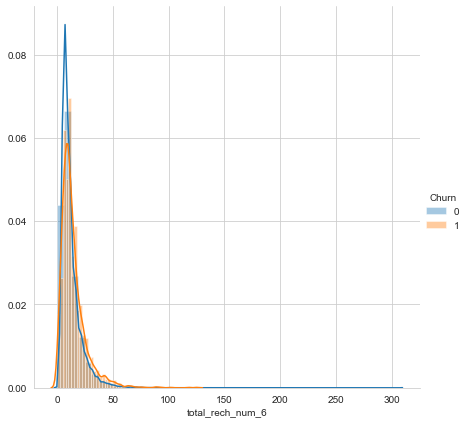

In [24]:
###Univariate Analysis 

##"total_rech_num_6","total_rech_num_7","total_rech_num_8"

sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='Churn',size = 6).map(sns.distplot,"total_rech_num_6").add_legend()

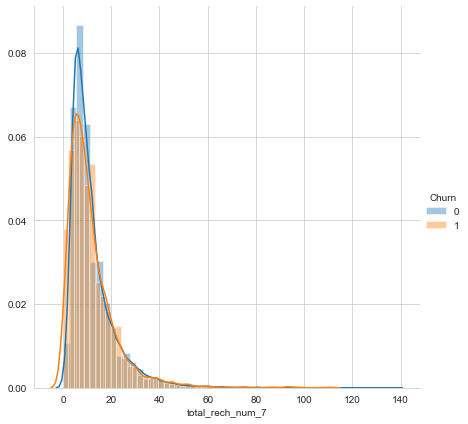

In [25]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom, hue='Churn',size=6).map(sns.distplot,"total_rech_num_7").add_legend()

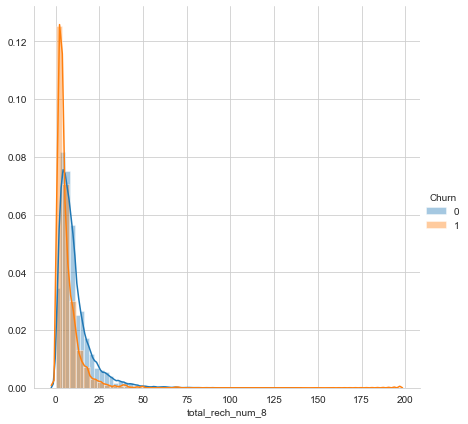

In [26]:
sns.FacetGrid(telecom, hue='Churn', size=6).map(sns.distplot, "total_rech_num_8").add_legend()

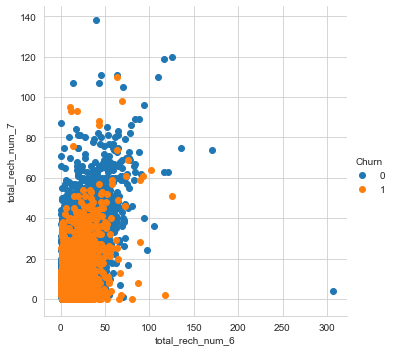

In [27]:
sns.FacetGrid(telecom, hue='Churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_7").add_legend()

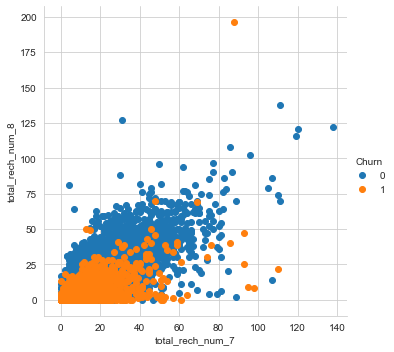

In [28]:
sns.FacetGrid(telecom, hue='Churn',size=5).map(plt.scatter,"total_rech_num_7","total_rech_num_8").add_legend()

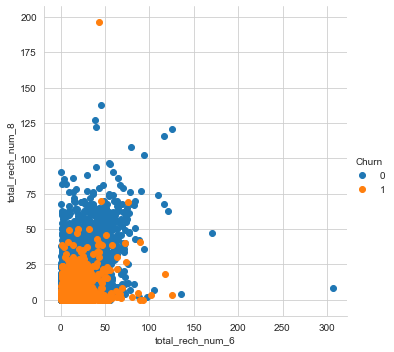

In [29]:
sns.FacetGrid(telecom, hue='Churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_8").add_legend()

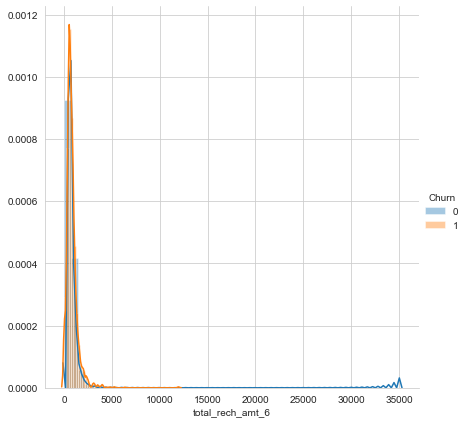

In [30]:
###Univarient Analysis on "total_rech_amt_6","total_rech_amt_7","total_rech_amt_8"

sns.FacetGrid(telecom, hue = 'Churn', size = 6).map(sns.distplot,"total_rech_amt_6").add_legend()

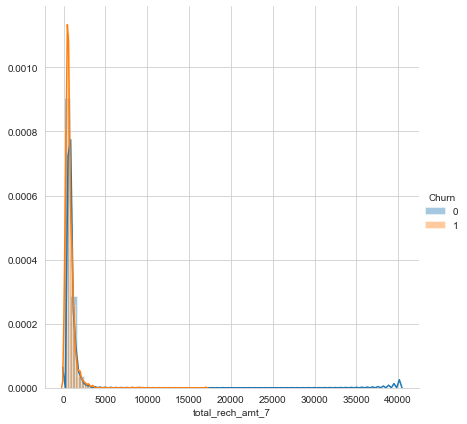

In [31]:
sns.FacetGrid(telecom, hue = 'Churn', size = 6).map(sns.distplot,"total_rech_amt_7").add_legend()

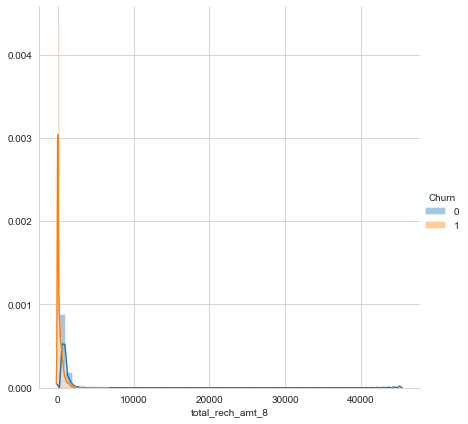

In [32]:
sns.FacetGrid(telecom, hue = 'Churn', size = 6).map(sns.distplot,"total_rech_amt_8").add_legend()

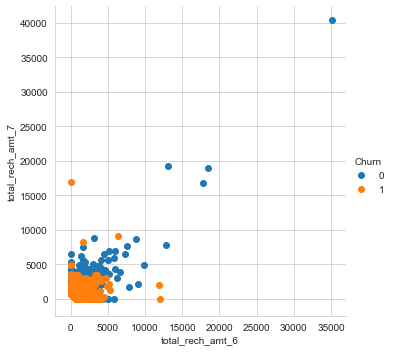

In [33]:
sns.FacetGrid(telecom, hue = 'Churn', size = 5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend() 

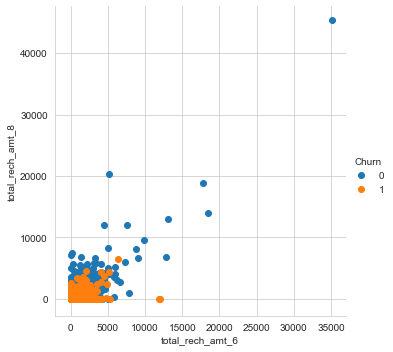

In [34]:
sns.FacetGrid(telecom, hue='Churn', size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_8").add_legend()

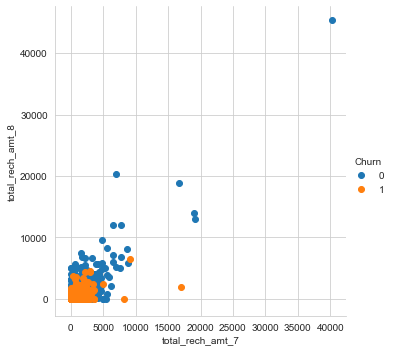

In [35]:
sns.FacetGrid(telecom, hue='Churn',size=5).map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()

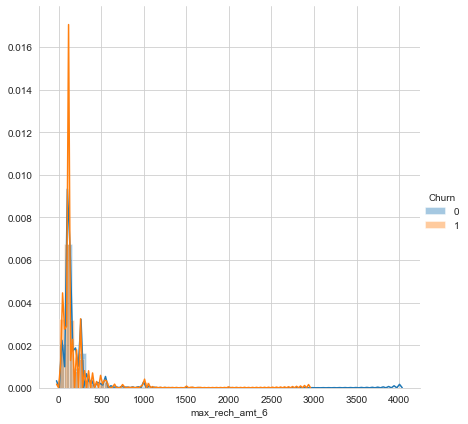

In [36]:
###Univariate analysis on "max_rech_amt_6", "max_rech_amt_7", "max_rech_amt_8"

sns.FacetGrid(telecom, hue = 'Churn', size = 6).map(sns.distplot,"max_rech_amt_6").add_legend()

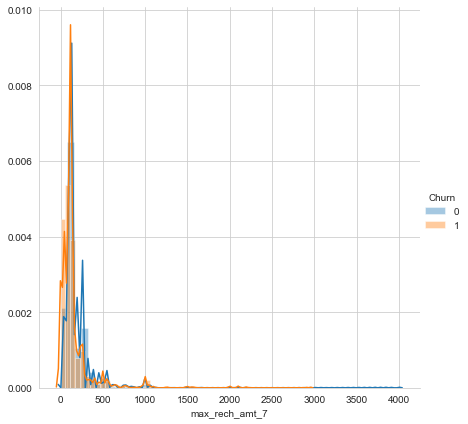

In [37]:
sns.FacetGrid(telecom, hue='Churn', size = 6).map(sns.distplot,"max_rech_amt_7").add_legend()

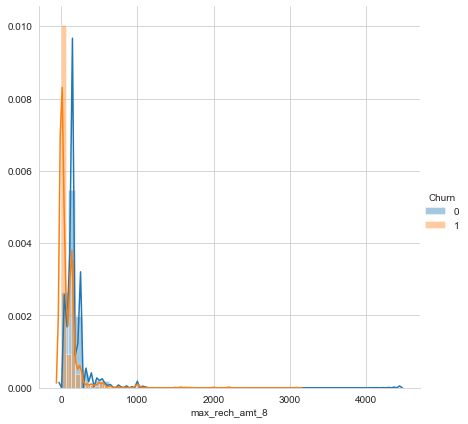

In [38]:
sns.FacetGrid(telecom, hue = 'Churn', size=6).map(sns.distplot,"max_rech_amt_8").add_legend()

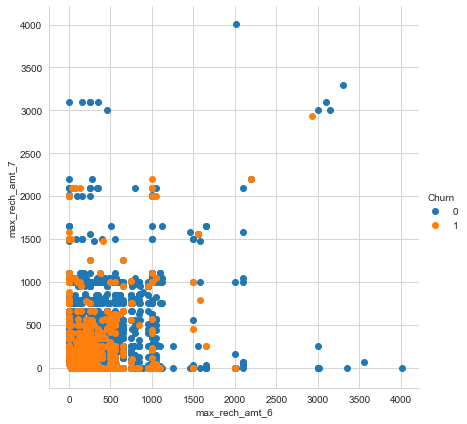

In [39]:
sns.FacetGrid(telecom, hue='Churn', size=6).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7").add_legend()

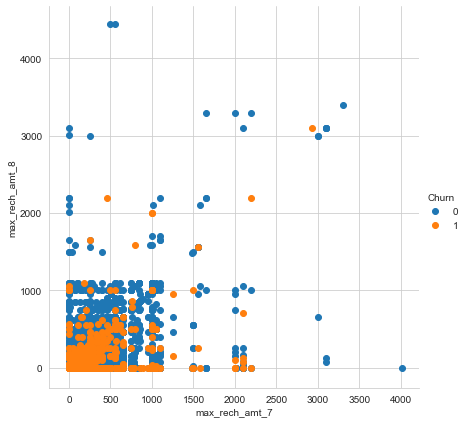

In [40]:
sns.FacetGrid(telecom,hue='Churn',size=6).map(plt.scatter,"max_rech_amt_7","max_rech_amt_8").add_legend()

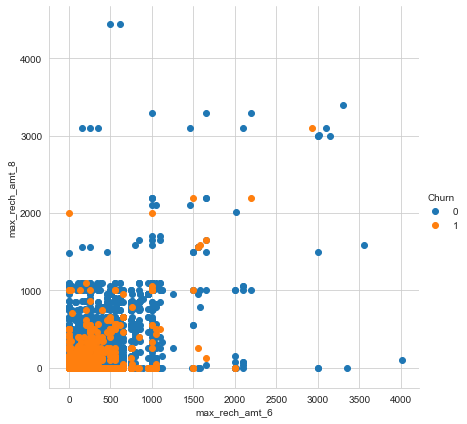

In [41]:
sns.FacetGrid(telecom,hue='Churn',size=6).map(plt.scatter,"max_rech_amt_6","max_rech_amt_8").add_legend()




###Iterrate the process for all the usage related columns  

In [42]:
telecom

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7         7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8         7001524846   378.721   492.223   137.362       413.69       351.03   
13        7002191713   492.846   205.671   593.260       501.76       108.39   
16        7000875565   430.975   299.869   187.894        50.51        74.01   
17        7000187447   690.008    18.980    25.499      1185.91         9.28   
...              ...       ...       ...       ...          ...          ...   
99970     7001386760   261.269   410.614   290.851         5.01       142.59   
99974     7001453306   414.303   321.093   371.016        17.56         0.00   
99986     7001729035   644.973   455.228   564.334       806.73       549.36   
99988     7002111859   312.558   512.932   402.080       199.89       174.46   
99997     7000498689   322.991   303.386   606.817         0.00         0.00   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7            52.29        453.43        567.16        325.91          16.23   
8            35.08         94.66         80.63        136.48           0.00   
13          534.24        413.31        119.28        482.46          23.53   
16           70.61        296.29        229.74        162.76           0.00   
17            7.79         61.64          0.00          5.54           0.00   
...            ...           ...           ...           ...            ...   
99970        97.61        329.58        500.14        355.48           5.06   
99974         1.30        428.41        366.78        360.58           0.00   
99986       775.41        784.76        617.13        595.44           0.00   
99988         2.46        175.88        277.01        248.33           0.00   
99997         0.00          0.00          0.00          0.00           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7              33.49          31.64          23.74          12.59   
8               0.00           0.00           0.00           0.00   
13            144.24          72.11           7.98          35.26   
16              2.83           0.00           0.00          17.74   
17              4.76           4.81           0.00           8.46   
...              ...            ...            ...            ...   
99970           0.00           0.00          46.04           0.00   
99974           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7              38.06             51.39             31.38             40.28   
8               0.00            297.13            217.59             12.49   
13              1.44             49.63              6.19             36.01   
16              0.00             42.61             65.16             67.38   
17             13.34             38.99              0.00              0.00   
...              ...               ...               ...               ...   
99970           0.00              5.01            131.71             76.83   
99974           0.00             10.11              0.00              0.00   
99986           0.00            709.21            496.14            718.56   
99988           0.00            170.28            146.48              2.46   
99997           0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
7                308.63            447.38            162.28             62.13   
8                 80.96             70.58             50.54              0.00   
13               151.13             47.28            294.46              4.54   
16     

# Correlation Matrix

In [43]:
#correlation matrix

corr = telecom.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [44]:
corr_values = corr.abs().unstack()
corr_values
corr_values[(corr_values>0.9)].sort_values(ascending=True).head(50)  

isd_og_mou_7      isd_og_mou_6        0.914988
isd_og_mou_6      isd_og_mou_7        0.914988
                  isd_og_mou_8        0.916080
isd_og_mou_8      isd_og_mou_6        0.916080
total_rech_amt_7  arpu_7              0.937130
arpu_7            total_rech_amt_7    0.937130
sachet_2g_6       count_rech_2g_6     0.937632
count_rech_2g_6   sachet_2g_6         0.937632
total_rech_amt_6  arpu_6              0.941239
arpu_6            total_rech_amt_6    0.941239
isd_og_mou_7      isd_og_mou_8        0.941344
isd_og_mou_8      isd_og_mou_7        0.941344
sachet_2g_7       count_rech_2g_7     0.946766
count_rech_2g_7   sachet_2g_7         0.946766
count_rech_2g_8   sachet_2g_8         0.948796
sachet_2g_8       count_rech_2g_8     0.948796
night_pck_user_8  fb_user_8           0.953334
fb_user_8         night_pck_user_8    0.953334
total_rech_amt_8  arpu_8              0.953738
arpu_8            total_rech_amt_8    0.953738
fb_user_7         night_pck_user_7    0.960776
night_pck_use

In [45]:
telecom = telecom.drop(['night_pck_user_8', 'fb_user_8',   'fb_user_7' , 'night_pck_user_7' , 'night_pck_user_6' , 
'fb_user_6','sachet_2g_6', 'count_rech_2g_6','sachet_2g_7','count_rech_2g_7','arpu_7', 'total_rech_amt_7','arpu_6',
'total_rech_amt_6', 'sachet_2g_8','count_rech_2g_8','isd_og_mou_7' ,'isd_og_mou_8','isd_og_mou_6','arpu_8','total_rech_amt_8'],axis=1)

In [46]:
telecom.describe()

mobile_number   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  \
count   2.999100e+04  29991.000000  29991.000000  29991.000000  29991.000000   
mean    7.001223e+09    297.364237    305.559931    270.850617    420.934658   
std     6.848384e+05    460.230637    481.232690    465.109877    469.004483   
min     7.000000e+09      0.000000      0.000000      0.000000      0.000000   
25%     7.000641e+09     43.400000     43.180000     33.880000    142.500000   
50%     7.001231e+09    128.210000    127.835000    106.190000    285.860000   
75%     7.001814e+09    353.310000    359.810000    297.675000    523.460000   
max     7.002411e+09   7376.710000   8157.780000  10752.560000   8362.360000   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count  29991.000000  29991.000000   29991.000000   29991.000000   
mean     426.749679    382.849498      17.419909      13.530711   
std      485.044367    473.483767      79.176792      76.329043   
min        0.000000      0.000000       0.000000       0.000000   
25%      140.845000    111.345000       0.000000       0.000000   
50%      285.455000    251.340000       0.000000       0.000000   
75%      532.800000    482.735000       0.000000       0.000000   
max     9667.130000  14007.340000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   29991.000000   29991.000000   29991.000000   29991.000000   
mean       13.254082      29.336341      22.042749      21.471637   
std        74.572342     118.606791      97.949989     106.274022   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3775.110000    2812.040000    5337.040000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count      29991.000000      29991.000000      29991.000000      29991.000000   
mean          95.022800         96.066520         88.091523        182.310938   
std          236.809712        248.102654        234.501733        249.636853   
min            0.000000          0.000000          0.000000          0.000000   
25%            8.960000          9.740000          7.720000         32.180000   
50%           33.280000         33.810000         30.730000        103.410000   
75%           91.425000         91.450000         84.630000        239.980000   
max         6431.330000       7400.660000      10752.560000       4729.740000   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count      29991.000000      29991.000000      29991.000000      29991.000000   
mean         182.290512        170.566322          6.975214          7.100062   
std          240.223657        233.381668         22.664481         22.591963   
min            0.000000          0.000000          0.000000          0.000000   
25%           35.540000         28.430000          0.000000          0.000000   
50%          106.005000         95.840000          0.380000          0.450000   
75%          239.260000        223.535000          5.080000          5.260000   
max         4557.140000       4961.330000       1466.030000       1196.430000   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
count      29991.000000      29991.000000      29991.000000      29991.000000   
mean           6.500226          1.571971          1.864794          1.716346   
std           20.220744          6.907247          9.262386          7.407591   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.310000          0.000000          0.000000          0.000000   
75%            4.660000          

# Modelling

In [47]:
# Train test Split
X = telecom.drop(['mobile_number','Churn'],axis=1)
y = telecom['Churn']


In [48]:
telecom['Churn'].value_counts()

0    27401
1     2590
Name: Churn, dtype: int64

In [49]:
#Usampling minority class to fix imbalance of data

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X, y)



In [50]:
RND_STATE = 42
ratio_test_size = 0.2


X_train, X_test ,y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size=ratio_test_size,
    random_state=RND_STATE,
)

In [51]:
cols = X_train.columns

scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])


In [52]:
X_test[cols] = scaler.transform(X_test[cols])

## Random Forest

In [78]:
#Modelling - Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, accuracy_score

num_splits = 5
num_iter_rndcv = 2 #200



# init Random Forest model
# -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf = RandomForestClassifier(random_state=RND_STATE)


# # --- fine-tuning

# parameter grid
# -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
param_distr = {
    "n_estimators": [int(x) for x in np.arange(start=10, stop=101, step=20)],
    "max_features": [int(x) for x in np.arange(start=10, stop=15, step=1)],
    "max_depth": [int(x) for x in np.arange(start=2, stop=5, step=1)],
    #"min_samples_split": [int(x) for x in np.arange(start=2, stop=51, step=1)],
    #"min_samples_leaf": [int(x) for x in np.arange(start=10, stop=51, step=1)],
}

# cross-validation strategy
# -> https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold
cv = StratifiedKFold(
    n_splits=num_splits,
    shuffle=True,
    random_state=RND_STATE,
)


random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_distr,
    n_iter=num_iter_rndcv,
    cv=cv,
    verbose=2,
    random_state=RND_STATE,
    n_jobs=1,  
)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

# get best model
best_model = random_search.best_estimator_


def normalize_cm(cm):
    """Return normalized confusion matrix"""
    return cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

def calc_accuracy(cm):
    """Return accuracy extracted from given confusion matrix"""
    return np.diag(cm).mean()

def basic_evaluation(y, y_pred, tag):
    """Print accuracy and confusion matrices for passed data"""
    print(tag)
    cm = confusion_matrix(y, y_pred)
    cm_norm = normalize_cm(cm)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    acc = calc_accuracy(cm_norm)
    results = pd.DataFrame([['Random Forest', acc,prec,rec]],columns=['Model', 'Accuracy', 'Precision', 'Recall'])
    print(results)    
    print('Confusion matrix:')
    print(cm)
    print(cm_norm)
    



# predict
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)


# evaluate model on training data
basic_evaluation(y_train, y_pred_train, "training")
basic_evaluation(y_test, y_pred_test, "test")





Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] n_estimators=90, max_features=10, max_depth=2 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... n_estimators=90, max_features=10, max_depth=2, total=   5.4s
[CV] n_estimators=90, max_features=10, max_depth=2 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] .... n_estimators=90, max_features=10, max_depth=2, total=   6.1s
[CV] n_estimators=90, max_features=10, max_depth=2 ...................
[CV] .... n_estimators=90, max_features=10, max_depth=2, total=   6.2s
[CV] n_estimators=90, max_features=10, max_depth=2 ...................
[CV] .... n_estimators=90, max_features=10, max_depth=2, total=   6.0s
[CV] n_estimators=90, max_features=10, max_depth=2 ...................
[CV] .... n_estimators=90, max_features=10, max_depth=2, total=   5.8s
[CV] n_estimators=70, max_features=12, max_depth=4 ...................
[CV] .... n_estimators=70, max_features=12, max_depth=4, total=   8.0s
[CV] n_estimators=70, max_features=12, max_depth=4 ...................
[CV] .... n_estimators=70, max_features=12, max_depth=4, total=   9.9s
[CV] n_estimators=70, max_features=12, max_depth=4 ...................
[CV] .... n_estimators=70, max_features=12, max_depth=4, total=  10.1s
[CV] n_estimators=70, max_features=12, max_depth=4 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.3min finished


{'n_estimators': 70, 'max_features': 12, 'max_depth': 4}
training
           Model  Accuracy  Precision    Recall
0  Random Forest  0.884575   0.896614  0.868949
Confusion matrix:
[[19772  2192]
 [ 2867 19010]]
[[0.90020033 0.09979967]
 [0.13105088 0.86894912]]
test
           Model  Accuracy  Precision    Recall
0  Random Forest  0.884006   0.900056  0.865677
Confusion matrix:
[[4906  531]
 [ 742 4782]]
[[0.90233585 0.09766415]
 [0.13432295 0.86567705]]


### RF- Feature Importance

In [75]:
# --- feature importances 
X_orig_dtypes = X.dtypes
# get importances and calc variance across trees
ft_importances = best_model.feature_importances_
ft_importances_std = np.std(
    [tree.feature_importances_ for tree in best_model.estimators_],
    axis=0,
)
ft_importances_sorted_idx = np.argsort(ft_importances)[::-1]

# display forests' ranked importance
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1:d}: feature {ft_importances_sorted_idx[f]:d} "
          f"('{X.columns[ft_importances_sorted_idx[f]]}'; "
          f"type: {X_orig_dtypes[ft_importances_sorted_idx[f]]}) "
          f"({ft_importances[ft_importances_sorted_idx[f]]:.4f})")

Feature ranking:
1: feature 74 ('total_ic_mou_8'; type: float64) (0.1375)
2: feature 47 ('total_og_mou_8'; type: float64) (0.1199)
3: feature 11 ('roam_og_mou_8'; type: float64) (0.0905)
4: feature 8 ('roam_ic_mou_8'; type: float64) (0.0892)
5: feature 89 ('max_rech_amt_8'; type: int64) (0.0793)
6: feature 92 ('count_rech_3g_8'; type: float64) (0.0641)
7: feature 17 ('loc_og_t2m_mou_8'; type: float64) (0.0435)
8: feature 53 ('loc_ic_t2m_mou_8'; type: float64) (0.0382)
9: feature 50 ('loc_ic_t2t_mou_8'; type: float64) (0.0337)
10: feature 86 ('total_rech_num_8'; type: int64) (0.0300)
11: feature 59 ('loc_ic_mou_8'; type: float64) (0.0280)
12: feature 14 ('loc_og_t2t_mou_8'; type: float64) (0.0261)
13: feature 5 ('offnet_mou_8'; type: float64) (0.0228)
14: feature 26 ('loc_og_mou_8'; type: float64) (0.0218)
15: feature 10 ('roam_og_mou_7'; type: float64) (0.0168)
16: feature 38 ('std_og_mou_8'; type: float64) (0.0112)
17: feature 2 ('onnet_mou_8'; type: float64) (0.0110)
18: feature 71 (

## Logistic Regression

In [55]:


#Model Building (Logistic Regression)

classifier = LogisticRegression(random_state=42, penalty='l2')


# fit the model with data
classifier.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [56]:
# Test data
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression ', acc,prec,rec]],columns=['Model', 'Accuracy', 'Precision', 'Recall'])
results

Model  Accuracy  Precision    Recall
0  Logistic Regression (Lasso)  0.862604   0.860812  0.867668

In [57]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4662,  775],
       [ 731, 4793]], dtype=int64)

## Logistic + RFE

In [58]:

#Recursive feature elimination


#Select best feature 
rfe = RFE(classifier, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[ True False  True  True False  True False False False  True  True  True
  True False  True False  True False False False False False False False
  True False False False  True  True  True False False False False False
 False  True  True False False False False False False  True  True  True
  True  True  True  True False False False False False  True False  True
 False False False False  True  True False False False  True False  True
  True  True  True False False  True  True  True  True False False False
 False  True  True False False False  True  True  True False False  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True False False  True]
[ 1 12  1  1 31  1 37  7 40  1  1  1  1 32  1  2  1 13 36 15 46 39 38 43
  1 30 11 21  1  1  1 14 41 55 44 22 16  1  1 23 51 42 48 25 45  1  1  1
  1  1  1  1 33  9 58 35 10  1 52  1  4 34 20  5  1  1 50 29 53  1  3  1
  1  1  1 18 19  1  1  1  1 54 17  6 49  1  1 57 28 27  1  1  1 26  8  1
  1  1  1  1  1  1 

Index(['onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_mou_6', 'loc_ic_mou_8',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_6', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6

In [59]:
classifier = LogisticRegression(random_state=42, penalty= 'l2')
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE ', acc, prec, rec]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall'])

results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Precision    Recall
0  Logistic Regression (Lasso)  0.862604   0.860812  0.867668
1     Logistic Regression RFE   0.861691   0.859655  0.867125

## PCA Model

In [60]:
###PCA on training data

pca = Pipeline([('scaler', StandardScaler()),('pca', PCA())])
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [61]:
###Extracting model 
pca = pca.named_steps['pca']

###Varience explained by the components
pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100)

0       10.55
1       18.77
2       24.70
3       29.49
4       33.42
        ...  
108    100.00
109    100.00
110    100.00
111    100.00
112    100.00
Length: 113, dtype: float64

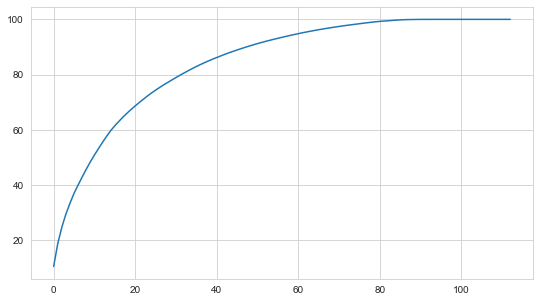

In [62]:
##Feature varience 
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(180/20,100/20))
plt.plot(cumulative_variance)

In [89]:
#######PCA + Logistic
pca_variables = 60
pca = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=pca_variables)),("logistic",LogisticRegression(class_weight='balanced'))])               

In [90]:
pca.fit(X_train,y_train)

###Score on training data 
pca.score(X_train, y_train)

0.8334207705116216

In [91]:
###Evaluating on test 

###Predict churn test data 
y_pred = pca.predict(X_test)

###Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

###Sensitivity and specificity 
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
sensitivity 
#specificity

###AUC 
y_pred_prob = pca.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.903081568788001

In [92]:
###Applying logistic regression with 60 variables

pca60 = PCA(n_components=pca_variables)
df_train_60 = pca60.fit_transform(X_train)
df_train_60.shape

df_test_60 = pca60.transform(X_test)
df_test_60.shape

(10961, 50)

In [93]:
###Running the model with the selected columns 
log_sk =LogisticRegression(C=1e9)
log_sk.fit(df_train_60, y_train)

###Predict the probability 

y_pred_60 = log_sk.predict(df_test_60)
y_pred_60

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [94]:
###Confusion Matrix
confusion_matrix(y_test,y_pred_60)

array([[4350, 1087],
       [ 735, 4789]], dtype=int64)

In [95]:
acc = accuracy_score(y_test,y_pred_60)
prec = precision_score(y_test,y_pred_60)
rec = recall_score(y_test,y_pred_60)

In [96]:
results = pd.DataFrame([['PCA+Logistic', acc,prec,rec]],columns=['Model', 'Accuracy', 'Precision', 'Recall'])
results

Model  Accuracy  Precision    Recall
0  PCA   0.833774    0.81501  0.866944

### Plotting Important Features

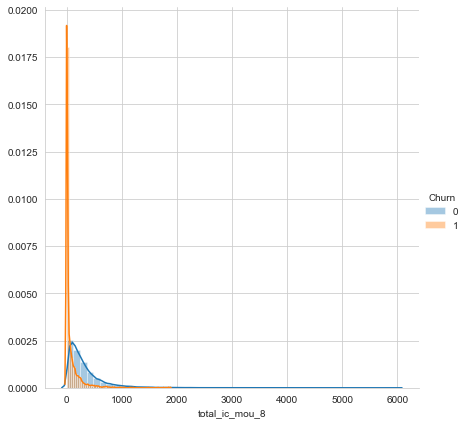

In [101]:
sns.FacetGrid(telecom,hue='Churn',size=6).map(sns.distplot,"total_ic_mou_8").add_legend()

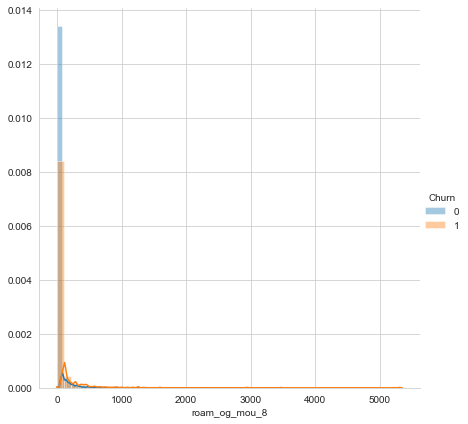

In [117]:
sns.FacetGrid(telecom,hue='Churn',size=6).map(sns.distplot,"roam_og_mou_8").add_legend()

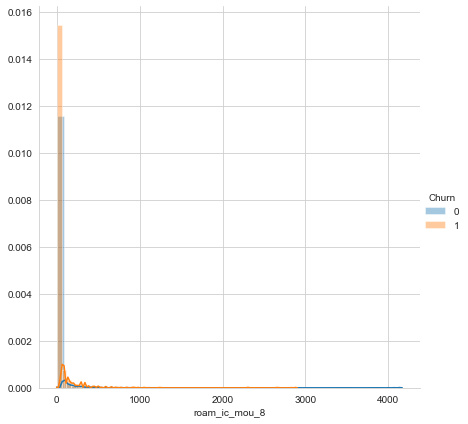

In [114]:
sns.FacetGrid(telecom,hue='Churn',size=6).map(sns.distplot,"roam_ic_mou_8").add_legend()

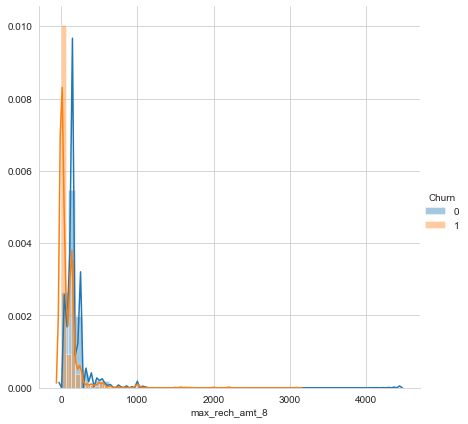

In [105]:
sns.FacetGrid(telecom,hue='Churn',size=6).map(sns.distplot,"max_rech_amt_8").add_legend()

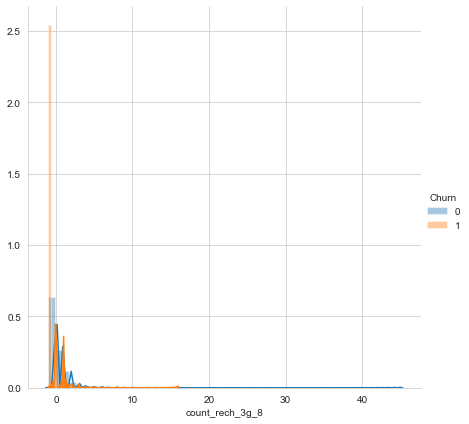

In [107]:
sns.FacetGrid(telecom,hue='Churn',size=6).map(sns.distplot,"count_rech_3g_8").add_legend()

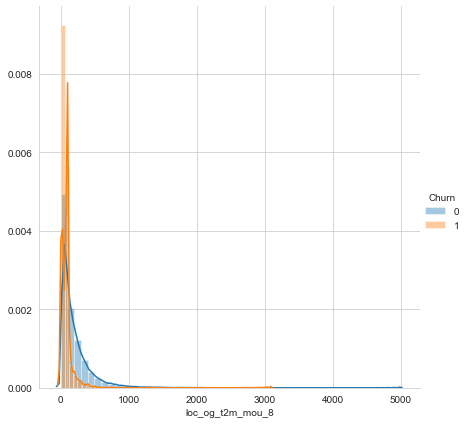

In [108]:
sns.FacetGrid(telecom,hue='Churn',size=6).map(sns.distplot,"loc_og_t2m_mou_8").add_legend()

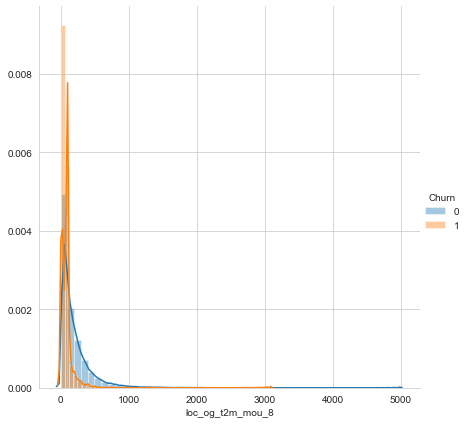

In [100]:
sns.FacetGrid(telecom,hue='Churn',size=6).map(sns.distplot,"loc_og_t2m_mou_8").add_legend()

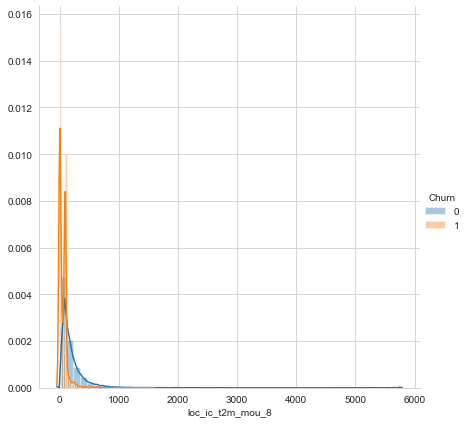

In [109]:
sns.FacetGrid(telecom,hue='Churn',size=6).map(sns.distplot,"loc_ic_t2m_mou_8").add_legend()

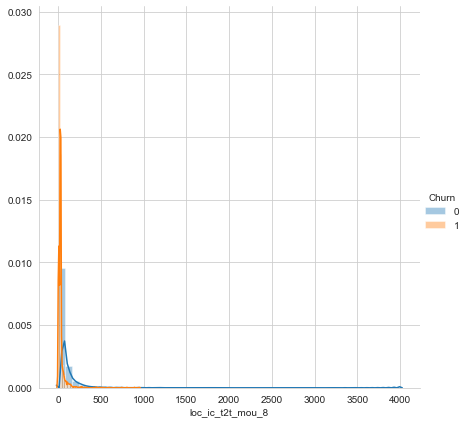

In [110]:
sns.FacetGrid(telecom,hue='Churn',size=6).map(sns.distplot,"loc_ic_t2t_mou_8").add_legend()

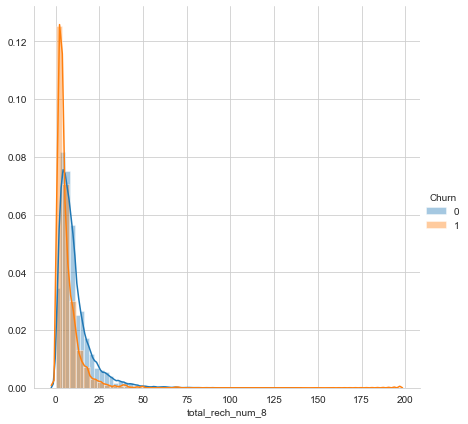

In [111]:
sns.FacetGrid(telecom,hue='Churn',size=6).map(sns.distplot,"total_rech_num_8").add_legend()